<a href="https://colab.research.google.com/github/neochiai555/transfer_learning/blob/main/trabalho_01_transfer_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%matplotlib inline

import os

#if using Theano with GPU
#os.environ["KERAS_BACKEND"] = "tensorflow"

import random
import numpy as np
import keras
import gc

import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow

from keras.preprocessing import image
from keras.applications.imagenet_utils import preprocess_input
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Activation
from keras.layers import Conv2D, MaxPooling2D
from keras.models import Model

In [2]:
!echo "Downloading cats and dogs dataset"
!curl -L -o catasanddogs.zip --progress-bar https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_5340.zip
!unzip catasanddogs.zip -d .
!rm catasanddogs.zip
!ls


A saída de streaming foi truncada nas últimas 5000 linhas.
  inflating: ./PetImages/Dog/5501.jpg  
  inflating: ./PetImages/Dog/5502.jpg  
  inflating: ./PetImages/Dog/5503.jpg  
  inflating: ./PetImages/Dog/5504.jpg  
  inflating: ./PetImages/Dog/5505.jpg  
  inflating: ./PetImages/Dog/5506.jpg  
  inflating: ./PetImages/Dog/5507.jpg  
  inflating: ./PetImages/Dog/5508.jpg  
  inflating: ./PetImages/Dog/5509.jpg  
  inflating: ./PetImages/Dog/551.jpg  
  inflating: ./PetImages/Dog/5510.jpg  
  inflating: ./PetImages/Dog/5511.jpg  
  inflating: ./PetImages/Dog/5512.jpg  
  inflating: ./PetImages/Dog/5513.jpg  
  inflating: ./PetImages/Dog/5514.jpg  
  inflating: ./PetImages/Dog/5515.jpg  
  inflating: ./PetImages/Dog/5516.jpg  
  inflating: ./PetImages/Dog/5517.jpg  
  inflating: ./PetImages/Dog/5518.jpg  
  inflating: ./PetImages/Dog/5519.jpg  
  inflating: ./PetImages/Dog/552.jpg  
  inflating: ./PetImages/Dog/5520.jpg  
  inflating: ./PetImages/Dog/5521.jpg  
  inflating: ./PetImage

In [3]:
root = 'PetImages'
train_split, val_split = 0.7, 0.15

categories = [x[0] for x in os.walk(root) if x[0]][1:]
categories = [c for c in categories]

print(categories)

['PetImages/Cat', 'PetImages/Dog']


Função para carregar a imagem em um objeto de imagem e um vetor.

In [4]:
# helper function to load image and return it and input vector
gc.collect()
def get_image(path):
  try:
    img = image.load_img(path, target_size=(224, 224))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    return img, x
  except:
    return None, None

Carregar todas as imagens da pasta raiz.

In [5]:
data = []
for c, category in enumerate(categories):
    images = [os.path.join(dp, f) for dp, dn, filenames
              in os.walk(category) for f in filenames
              if os.path.splitext(f)[1].lower() in ['.jpg','.png','.jpeg']]
    for i, img_path in enumerate(images):
      print(img_path)
      if i > 2000:
        break
      img, x = get_image(img_path)
      if img is not None:
        data.append({'x':np.array(x[0]), 'y':c})

# count the number of classes
num_classes = len(categories)

PetImages/Cat/9115.jpg
PetImages/Cat/9729.jpg
PetImages/Cat/8352.jpg
PetImages/Cat/11867.jpg
PetImages/Cat/11073.jpg
PetImages/Cat/365.jpg
PetImages/Cat/11813.jpg
PetImages/Cat/4573.jpg
PetImages/Cat/5951.jpg
PetImages/Cat/9765.jpg
PetImages/Cat/8140.jpg
PetImages/Cat/60.jpg
PetImages/Cat/11941.jpg
PetImages/Cat/8364.jpg
PetImages/Cat/12223.jpg
PetImages/Cat/7348.jpg
PetImages/Cat/2488.jpg
PetImages/Cat/5141.jpg
PetImages/Cat/6434.jpg
PetImages/Cat/10315.jpg
PetImages/Cat/12096.jpg
PetImages/Cat/3721.jpg
PetImages/Cat/10236.jpg
PetImages/Cat/4939.jpg
PetImages/Cat/10041.jpg
PetImages/Cat/10921.jpg
PetImages/Cat/5771.jpg
PetImages/Cat/2263.jpg
PetImages/Cat/2514.jpg
PetImages/Cat/12154.jpg
PetImages/Cat/4833.jpg
PetImages/Cat/622.jpg
PetImages/Cat/9481.jpg
PetImages/Cat/4390.jpg
PetImages/Cat/8244.jpg
PetImages/Cat/3699.jpg
PetImages/Cat/10972.jpg
PetImages/Cat/8358.jpg
PetImages/Cat/7602.jpg
PetImages/Cat/6161.jpg
PetImages/Cat/10759.jpg
PetImages/Cat/407.jpg
PetImages/Cat/11988.jpg
Pe

/usr/local/lib/python3.10/dist-packages/PIL/TiffImagePlugin.py:935: UserWarning: Truncated File Read
  warnings.warn(str(msg))


PetImages/Dog/869.jpg
PetImages/Dog/12074.jpg
PetImages/Dog/2661.jpg
PetImages/Dog/3057.jpg
PetImages/Dog/4804.jpg
PetImages/Dog/6357.jpg
PetImages/Dog/9268.jpg
PetImages/Dog/401.jpg
PetImages/Dog/2141.jpg
PetImages/Dog/4200.jpg
PetImages/Dog/7241.jpg
PetImages/Dog/810.jpg
PetImages/Dog/11132.jpg
PetImages/Dog/10536.jpg
PetImages/Dog/4245.jpg
PetImages/Dog/4719.jpg
PetImages/Dog/3567.jpg
PetImages/Dog/7800.jpg
PetImages/Dog/76.jpg
PetImages/Dog/5138.jpg
PetImages/Dog/270.jpg
PetImages/Dog/6912.jpg
PetImages/Dog/698.jpg
PetImages/Dog/5044.jpg
PetImages/Dog/7954.jpg
PetImages/Dog/6203.jpg
PetImages/Dog/2501.jpg
PetImages/Dog/4234.jpg
PetImages/Dog/8207.jpg
PetImages/Dog/10884.jpg
PetImages/Dog/1984.jpg
PetImages/Dog/5387.jpg
PetImages/Dog/10537.jpg
PetImages/Dog/8999.jpg
PetImages/Dog/1413.jpg
PetImages/Dog/12149.jpg
PetImages/Dog/6499.jpg
PetImages/Dog/2779.jpg
PetImages/Dog/11649.jpg
PetImages/Dog/1985.jpg
PetImages/Dog/1641.jpg
PetImages/Dog/8276.jpg
PetImages/Dog/2914.jpg
PetImages/D

Randomizar a ordem dos dados.

In [6]:
random.shuffle(data)

Dividir os dado em treinamento / validação / teste (70%, 15%, 15%)

In [7]:
idx_val = int(train_split * len(data))
idx_test = int((train_split + val_split) * len(data))
train = data[:idx_val]
val = data[idx_val:idx_test]
test = data[idx_test:]

Separar os dados por labels.

In [8]:
x_train, y_train = np.array([t["x"] for t in train]), [t["y"] for t in train]
x_val, y_val = np.array([t["x"] for t in val]), [t["y"] for t in val]
x_test, y_test = np.array([t["x"] for t in test]), [t["y"] for t in test]
print(y_test)

[0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 

Preprocessar os dados para assegurar que são float32 e normalizados entre 0 e 1.

In [9]:
# normalize data
x_train = x_train.astype('float32') / 255.
x_val = x_val.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

# convert labels to one-hot vectors
y_train = keras.utils.to_categorical(y_train, num_classes)
y_val = keras.utils.to_categorical(y_val, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)
print(y_test.shape)

(601, 2)


Sumário do resultado até aqui:

In [10]:
# summary
print("finished loading %d images from %d categories"%(len(data), num_classes))
print("train / validation / test split: %d, %d, %d"%(len(x_train), len(x_val), len(x_test)))
print("training data shape: ", x_train.shape)
print("training labels shape: ", y_train.shape)


finished loading 4001 images from 2 categories
train / validation / test split: 2800, 600, 601
training data shape:  (2800, 224, 224, 3)
training labels shape:  (2800, 2)


Vamos agora visualizar alguns dados do nosso dataset.

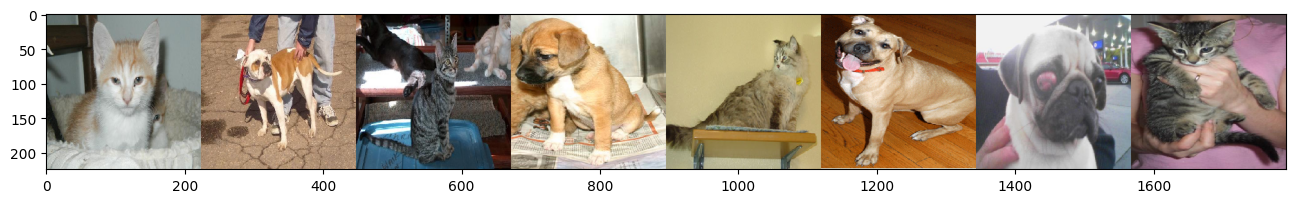

In [11]:
images = [os.path.join(dp, f) for dp, dn, filenames in os.walk(root) for f in filenames if os.path.splitext(f)[1].lower() in ['.jpg','.png','.jpeg']]
idx = [int(len(images) * random.random()) for i in range(8)]
imgs = [image.load_img(images[i], target_size=(224, 224)) for i in idx]
concat_image = np.concatenate([np.asarray(img) for img in imgs], axis=1)
plt.figure(figsize=(16,4))
plt.imshow(concat_image)

Primeiramente vamos criar e treinar uma rede neural do zero.

In [12]:
# build the network
model = Sequential()
print("Input dimensions: ",x_train.shape[1:])

model.add(Conv2D(32, (3, 3), input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Dropout(0.25))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(256))
model.add(Activation('relu'))

model.add(Dropout(0.5))

model.add(Dense(num_classes))
model.add(Activation('softmax'))

model.summary()

Input dimensions:  (224, 224, 3)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 222, 222, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation (Activation)              │ (None, 222, 222, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 111, 111, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 109, 109, 32)        │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_1 (Activation)            │ (None, 109, 109, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 54, 54, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 54, 54, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 52, 52, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_2 (Activation)            │ (None, 52, 52, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 26, 26, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 24, 24, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_3 (Activation)            │ (None, 24, 24, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 12, 12, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 12, 12, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 4608)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │       1,179,904 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_4 (Activation)            │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 2)                   │             514 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_5 (Activation)            │ (None, 2)                   │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,209,058 (4.61 MB)

 Trainable params: 1,209,058 (4.61 MB)

 Non-trainable params: 0 (0.00 B)

Agora vamos treinar o modelo com 100 épocas e um tamanho de batch de 128, e guardar o histórico para uo posterior.

In [13]:
# compile the model to use categorical cross-entropy loss function and adadelta optimizer
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
                    batch_size=128,
                    epochs=10,
                    validation_data=(x_val, y_val))


Epoch 1/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 35s 950ms/step - accuracy: 0.5250 - loss: 0.7002 - val_accuracy: 0.6083 - val_loss: 0.6735
Epoch 2/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 3s 146ms/step - accuracy: 0.6157 - loss: 0.6636 - val_accuracy: 0.6133 - val_loss: 0.6538
Epoch 3/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 3s 145ms/step - accuracy: 0.6428 - loss: 0.6326 - val_accuracy: 0.6067 - val_loss: 0.6462
Epoch 4/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 5s 161ms/step - accuracy: 0.6492 - loss: 0.6131 - val_accuracy: 0.6217 - val_loss: 0.6308
Epoch 5/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 5s 162ms/step - accuracy: 0.6883 - loss: 0.5907 - val_accuracy: 0.6450 - val_loss: 0.6075
Epoch 6/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 5s 154ms/step - accuracy: 0.7245 - loss: 0.5491 - val_accuracy: 0.6817 - val_loss: 0.5819
Epoch 7/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 6s 182ms/step - accuracy: 0.7385 - loss: 0.5166 - val_accuracy: 0.6767 - val_loss: 0.5823
Epoch 8/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 4s 149ms/step - accuracy: 0.7576 - loss: 0.4931 - val_accuracy: 0

Vamos plotar a perda de validação e a acurácia pelo tempo.

KeyError: 'val_acc'

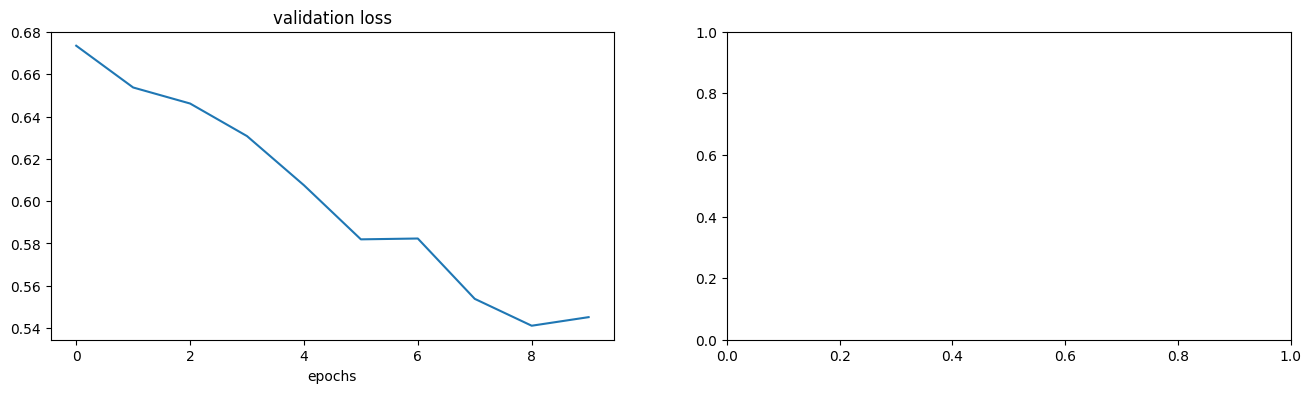

In [15]:
fig = plt.figure(figsize=(16,4))
ax = fig.add_subplot(121)
ax.plot(history.history["val_loss"])
ax.set_title("validation loss")
ax.set_xlabel("epochs")

ax2 = fig.add_subplot(122)
ax2.plot(history.history["val_acc"])
ax2.set_title("validation accuracy")
ax2.set_xlabel("epochs")
ax2.set_ylim(0, 1)

plt.show()

Vamos executar nosso modelo nos dados de treinamento e verificar a perda e acurácia:

In [16]:
loss, accuracy = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', loss)
print('Test accuracy:', accuracy)

Test loss: 0.5840194821357727
Test accuracy: 0.7287853360176086


Nossa acurácia foi de 72%, muito bom para os dados que usamos. Agora vamos usar o modelo VGG16 da keras, que foi treinado sobre a ImageNet.

In [17]:
vgg = keras.applications.VGG16(weights='imagenet', include_top=True)
vgg.summary()

553467096/553467096 ━━━━━━━━━━━━━━━━━━━━ 13s 0us/step


Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 224, 224, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 224, 224, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 112, 112, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 112, 112, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 56, 56, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 28, 28, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 28, 28, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 14, 14, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 7, 7, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ fc1 (Dense)                          │ (None, 4096)                │     102,764,544 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 138,357,544 (527.79 MB)

 Trainable params: 138,357,544 (527.79 MB)

 Non-trainable params: 0 (0.00 B)

Agora vamos remover a primeira e a última camadas e recriá-las como novas.

In [18]:
# make a reference to VGG's input layer
inp = vgg.input

# make a new softmax layer with num_classes neurons
new_classification_layer = Dense(num_classes, activation='softmax')

# connect our new layer to the second to last layer in VGG, and make a reference to it
out = new_classification_layer(vgg.layers[-2].output)

# create a new network between inp and out
model_new = Model(inp, out)


Agora vamos congelar todas camadas menos a última, e compilar o modelo:

In [19]:
# make all layers untrainable by freezing weights (except for last layer)
for l, layer in enumerate(model_new.layers[:-1]):
    layer.trainable = False

# ensure the last layer is trainable/not frozen
for l, layer in enumerate(model_new.layers[-1:]):
    layer.trainable = True

model_new.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model_new.summary()

Model: "functional_20"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 224, 224, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 224, 224, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 112, 112, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 112, 112, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 56, 56, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 28, 28, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 28, 28, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 14, 14, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 7, 7, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ fc1 (Dense)                          │ (None, 4096)                │     102,764,544 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 134,268,738 (512.19 MB)

 Trainable params: 8,194 (32.01 KB)

 Non-trainable params: 134,260,544 (512.16 MB)

Em seguida vamos treinar a rede usando nossos dados.

In [20]:
history2 = model_new.fit(x_train, y_train,
                         batch_size=128,
                         epochs=10,
                         validation_data=(x_val, y_val))


Epoch 1/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 131s 4s/step - accuracy: 0.5332 - loss: 0.8691 - val_accuracy: 0.7033 - val_loss: 0.5222
Epoch 2/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 27s 727ms/step - accuracy: 0.7814 - loss: 0.4707 - val_accuracy: 0.8383 - val_loss: 0.3864
Epoch 3/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 23s 868ms/step - accuracy: 0.8786 - loss: 0.3557 - val_accuracy: 0.8483 - val_loss: 0.3436
Epoch 4/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 20s 857ms/step - accuracy: 0.8835 - loss: 0.3233 - val_accuracy: 0.8667 - val_loss: 0.3178
Epoch 5/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 18s 733ms/step - accuracy: 0.8903 - loss: 0.3008 - val_accuracy: 0.8667 - val_loss: 0.3124
Epoch 6/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 20s 732ms/step - accuracy: 0.8845 - loss: 0.2878 - val_accuracy: 0.8817 - val_loss: 0.3010
Epoch 7/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 23s 856ms/step - accuracy: 0.8994 - loss: 0.2657 - val_accuracy: 0.8950 - val_loss: 0.2740
Epoch 8/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 18s 749ms/step - accuracy: 0.8964 - loss: 0.2553 - val_accura

Veja que a acurácia agora está perto de 89%, muito acima da que obtivemos com a rede menor e treinada do zero.
Vamos agora plotar a perda e a acurácia.

KeyError: 'val_acc'

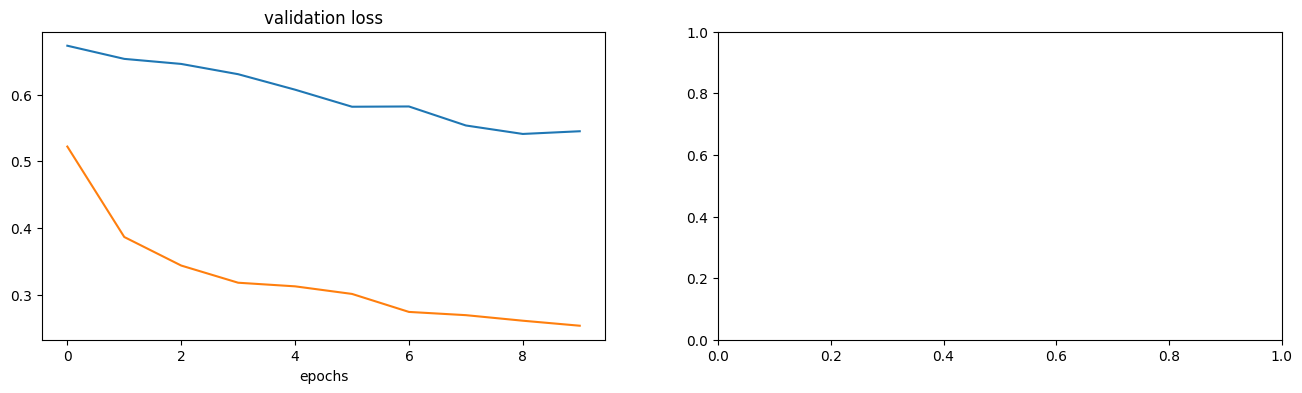

In [21]:
fig = plt.figure(figsize=(16,4))
ax = fig.add_subplot(121)
ax.plot(history.history["val_loss"])
ax.plot(history2.history["val_loss"])
ax.set_title("validation loss")
ax.set_xlabel("epochs")

ax2 = fig.add_subplot(122)
ax2.plot(history.history["val_acc"])
ax2.plot(history2.history["val_acc"])
ax2.set_title("validation accuracy")
ax2.set_xlabel("epochs")
ax2.set_ylim(0, 1)

plt.show()

Vamos agora obter a perda e acurácia sobre os dados de teste.

In [22]:
loss, accuracy = model_new.evaluate(x_test, y_test, verbose=0)

print('Test loss:', loss)
print('Test accuracy:', accuracy)

Test loss: 0.2395935356616974
Test accuracy: 0.9134775400161743


Testando a rede com uma nova imagem de um gato:

In [25]:
img, x = get_image('dog.jpg')
probabilities = model_new.predict([x])
print(probabilities)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
[[3.8180363e-24 1.0000000e+00]]
